<a href="https://colab.research.google.com/github/Pavankalyan2006/AD-/blob/master/7_2_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files
import numpy as np

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
df = df.drop(columns=["Id"])

X = df.drop(columns=["Price"])
y = df["Price"]

categorical_features = ["Model"]
numeric_features = ["Age_08_04", "KM", "HP", "Doors", "Cylinders", "Gears", "Weight"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

def predict_car_price():
    model_input = input("Enter Model: ")
    age = int(input("Enter Age of Car: "))
    km = int(input("Enter Kilometers Driven: "))
    hp = int(input("Enter Horsepower: "))
    doors = int(input("Enter Number of Doors: "))
    cylinders = int(input("Enter Number of Cylinders: "))
    gears = int(input("Enter Number of Gears: "))
    weight = int(input("Enter Weight of Car: "))

    input_data = pd.DataFrame([[model_input, age, km, hp, doors, cylinders, gears, weight]],
                              columns=categorical_features + numeric_features)

    predicted_price = model.predict(input_data)[0]
    print(f"Predicted Car Price: {predicted_price:.2f}")

predict_car_price()

Saving NewspaperData.csv to NewspaperData (5).csv
First 5 rows of the dataset:
            Newspaper    daily   sunday
0       Baltimore Sun  391.952  488.506
1        Boston Globe  516.981  798.298
2       Boston Herald  355.628  235.084
3  Charlotte Observer  238.555  299.451
4   Chicago Sun Times  537.780  559.093

Column Data Types:
Newspaper     object
daily        float64
sunday       float64
dtype: object

Correlation Matrix:
           daily    sunday
daily   1.000000  0.958154
sunday  0.958154  1.000000


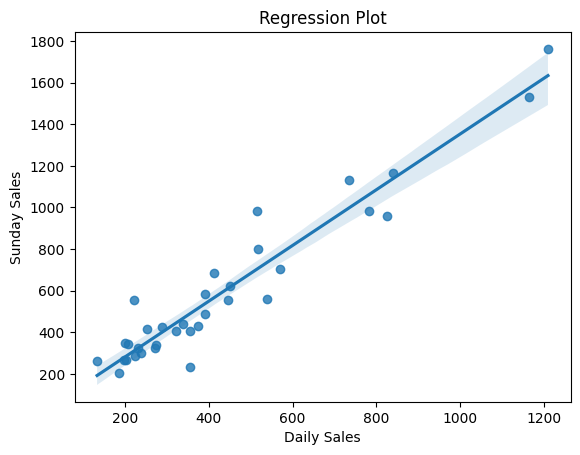

Reduced R-squared: 0.8706
Reduced Adjusted R-squared: 0.8665


In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


uploaded = files.upload()
file_name = list(uploaded.keys())[0]


df = pd.read_csv(f"/content/{file_name}")


print("First 5 rows of the dataset:")
print(df.head())


print("\nColumn Data Types:")
print(df.dtypes)


correlation_matrix = df.corr(numeric_only=True)


print("\nCorrelation Matrix:")
print(correlation_matrix)


sns.regplot(x="daily", y="sunday", data=df)
plt.xlabel("Daily Sales")
plt.ylabel("Sunday Sales")
plt.title("Regression Plot")
plt.show()


df['daily_noisy'] = df['daily'] + np.random.normal(0, 50, size=len(df))


X = df[['daily_noisy']]
y = df['sunday']


model = LinearRegression()
model.fit(X, y)


r2 = model.score(X, y)


n = len(y)
p = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))


print(f"Reduced R-squared: {r2:.4f}")
print(f"Reduced Adjusted R-squared: {adj_r2:.4f}")


Saving NewspaperData.csv to NewspaperData (6).csv
First 5 rows of the dataset:
            Newspaper    daily   sunday
0       Baltimore Sun  391.952  488.506
1        Boston Globe  516.981  798.298
2       Boston Herald  355.628  235.084
3  Charlotte Observer  238.555  299.451
4   Chicago Sun Times  537.780  559.093

Column Data Types:
Newspaper     object
daily        float64
sunday       float64
dtype: object

Correlation Matrix:
           daily    sunday
daily   1.000000  0.958154
sunday  0.958154  1.000000


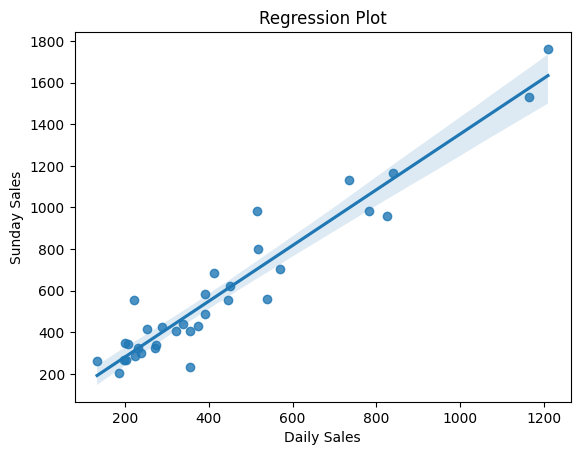

R-squared after removing influential points: 0.9101
Adjusted R-squared: 0.9070


In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(f"/content/{file_name}")

print("First 5 rows of the dataset:")
print(df.head())

print("\nColumn Data Types:")
print(df.dtypes)

correlation_matrix = df.corr(numeric_only=True)

print("\nCorrelation Matrix:")
print(correlation_matrix)

sns.regplot(x="daily", y="sunday", data=df)
plt.xlabel("Daily Sales")
plt.ylabel("Sunday Sales")
plt.title("Regression Plot")
plt.show()

X = df[['daily']]
y = df['sunday']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

threshold = 4 / len(X)
df = df[cooks_d < threshold]

X = df[['daily']]
y = df['sunday']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

r2 = model.rsquared
n = len(y)
p = X.shape[1] - 1
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"R-squared after removing influential points: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")
